In [1]:
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
print(os.listdir("../input"))

Using TensorFlow backend.


['asl_alphabet_test', 'asl_alphabet_train']


In [2]:
train_dir = '../input/asl_alphabet_train/asl_alphabet_train'
test_dir = '../input/asl_alphabet_test/asl_alphabet_test'

unique_labels =  ['N', 'R', 'space', 'B', 'I', 'del', 'F', 'H', 'E', 'U', 'M', 'X', 'K', 'Q', 'Y', 'S', 'G', 'A', 'O', 'T', 'V', 'Z', 'C', 'P', 'L', 'W', 'D', 'nothing', 'J']


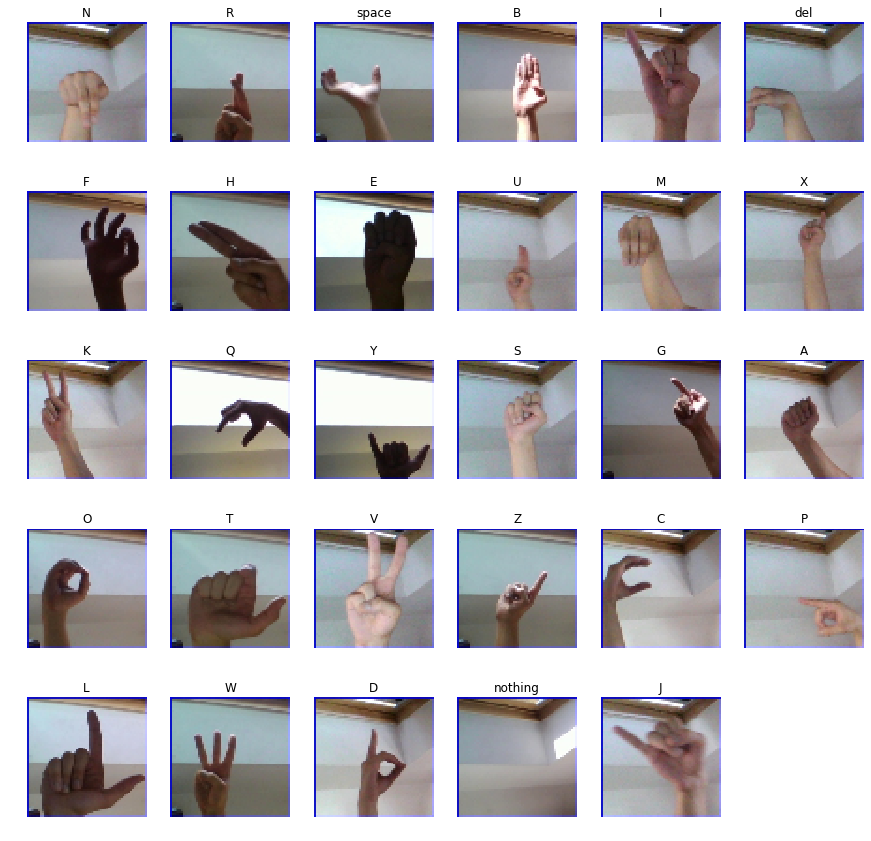

In [3]:
def load_unique():
    size_img = 64,64 
    images_for_plot = []
    labels_for_plot = []
    for folder in os.listdir(train_dir):
        for file in os.listdir(train_dir + '/' + folder):
            filepath = train_dir + '/' + folder + '/' + file
            image = cv2.imread(filepath)
            final_img = cv2.resize(image, size_img)
            final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
            images_for_plot.append(final_img)
            labels_for_plot.append(folder)
            break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique()
print("unique_labels = ", labels_for_plot)

fig = plt.figure(figsize = (15,15))
def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return

image_index = 0
row = 5
col = 6
for i in range(1,(row*col)):
    plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

In [4]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27,'nothing':28}

images = []
labels = []
size = 64,64

for folder in os.listdir(train_dir):
    print(folder, end = ' | ')
    for image in os.listdir(train_dir + "/" + folder):
        temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
        temp_img = cv2.resize(temp_img, size)
        images.append(temp_img)
        labels.append(labels_dict[folder])

images = np.array(images)
images = images.astype('float32') / 255.0

labels = keras.utils.to_categorical(labels)

X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.05)

N | R | space | B | I | del | F | H | E | U | M | X | K | Q | Y | S | G | A | O | T | V | Z | C | P | L | W | D | nothing | J | 

In [5]:
model = Sequential()

model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
#model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size = [3,3]))

model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
#model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size = [3,3]))

model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
#model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size = [3,3]))

model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(Dense(29, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [7]:
HISTORY = model.fit(X_train, Y_train, batch_size = 64, epochs = 5, validation_split = 0.1)

Train on 74385 samples, validate on 8265 samples
Epoch 1/5
74385/74385 [==============================] - 17s 226us/step - loss: 0.8388 - acc: 0.8236 - val_loss: 0.5175 - val_acc: 0.8872
Epoch 2/5
74385/74385 [==============================] - 14s 190us/step - loss: 0.1977 - acc: 0.9770 - val_loss: 0.2067 - val_acc: 0.9665
Epoch 3/5
74385/74385 [==============================] - 14s 186us/step - loss: 0.1635 - acc: 0.9821 - val_loss: 0.1163 - val_acc: 0.9895
Epoch 4/5
74385/74385 [==============================] - 14s 189us/step - loss: 0.1492 - acc: 0.9857 - val_loss: 0.0956 - val_acc: 0.9962
Epoch 5/5
74385/74385 [==============================] - 14s 184us/step - loss: 0.1507 - acc: 0.9856 - val_loss: 0.1299 - val_acc: 0.9952


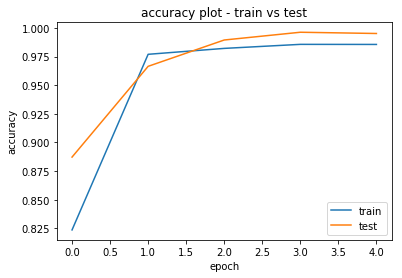

In [8]:
plt.plot(HISTORY.history['acc'])
plt.plot(HISTORY.history['val_acc'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('accuracy plot - train vs test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

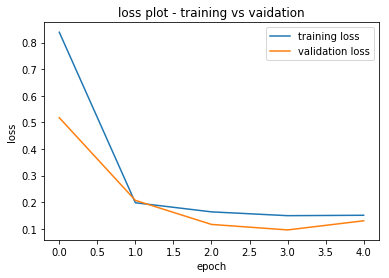

In [9]:
plt.plot(HISTORY.history['loss'])
plt.plot(HISTORY.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs vaidation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [10]:
evaluate_metrics = model.evaluate(X_test, Y_test)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluation loss = " ,"{:.6f}".format(evaluate_metrics[0]))

4350/4350 [==============================] - 0s 102us/step

Evaluation Accuracy =  99.40% 
Evaluation loss =  0.135156


In [11]:
model.save('sign_model.h5')